# Generalized Linear Models with Gradient Descent - Linear Regression

The solution for the least squares $\mathbf{w}$ in linear regression is given by:

$$
\mathbf{w}=(X^\top X)^{-1}X^\top\mathbf{y}
$$

So, why do gradient descent? Idk. Let's see how we do on the Boston housing dataset

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)
m = np.mean(X, axis=0)
s = np.std(X, axis=0)
    
X = (X - m) / s
y = (y - np.mean(y)) / np.std(y)

idx = np.random.permutation(X.shape[0])
j = int(X.shape[0] * 0.8) 

Xtr, ytr = X[idx[:j]], y[idx[:j]]
Xte, yte = X[idx[j:]], y[idx[j:]]

### Implementation: Helper functions
1. `mean_squared_error(X, y, w)` calculates the MSE based on training matrix $X$, labels $\mathbf{y}$ and feature weights $\mathbf{w}$
3. `loss_plotter` and `loss_scatter` plot the **MSE vs. iteration**, and **predicted vs. actual labels**

In [99]:
# Mean squared error from residual
# Square all residuals, sum them up, and take the mean
def mse_from_e(residual):
    squares = np.square(residual)
    summed = np.sum(squares)
    return summed / len(residual)

# Mean Squared Error of X.w - y
# Calculate Xy - w, and use mse_from_e to find error 
def mean_squared_error(X, y, w):
    e = np.dot(X,w) - y
    return mse_from_e(e)

# Plot loss as a function of epoch
def loss_plotter(vlist, fname):
    plt.plot(range(1, 1+len(vlist)), vlist,
           linewidth=2, linestyle='-', marker='o')
    plt.legend(('Loss'))
    plt.grid()
    xt = np.arange(0, len(vlist), 10)
    _ = plt.xticks(xt)
    _ = plt.xlabel('Iteration', fontsize=14)
    _ = plt.ylabel(fname, fontsize=14)
    _ = plt.title(fname)
    plt.show()
    return

# Scatter plot of predicted vs. observed targets
def loss_scatter(X, y, w, fname):
    p = plt.scatter(y, X.dot(w), edgecolors=(0,0,0))
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.grid()
    plt.xlabel('$y$', fontsize=14)
    plt.ylabel('$\hat{y}$', fontsize=14)
    plt.title(fname)
    plt.show()
    return

### Gradient Descent for GLMs - Linear Regression

For linear regression, $z_i=\mathbf{x_i}\cdot\mathbf{w}$, $h(z_i)=z_i$ and $\mathcal{l}_i(y_i, \hat{y}_i)=(y_i-\hat{y}_i)^2$. So,

$$\nabla_\mathbf{w}\mathcal{L}=\frac{1}{n}\sum_{i=1}^n \mathcal{l}'(y_i, \hat{y}_i)h'(z_i)\nabla_\mathbf{w}{z_i}
=\frac{2}{n}\sum_{i=1}^n (\hat{y}_i-y_i)\mathbf{x_i}$$

In [100]:
def gradient(X, w, y):
    n, d = X.shape
    
    y_hat = np.dot(X, w).reshape(n)
    e = y_hat - y
    
    weighted_sum_xi = e[0] * X[0,]
    
    for i in range (1, n):
        weighted_sum_xi += e[i] * X[i,]
        
    return 2/n * weighted_sum_xi.reshape(d,1)

### Gradient Descent Algorithm
Use $\mathbf{w}_{t+1}\leftarrow\mathbf{w}_t - \frac{1}{\sqrt{t}}\nabla_\mathbf{w}\mathcal{L}(\mathbf{w_t})$  find a suitable $\mathbf{w}$

714.1064886955446


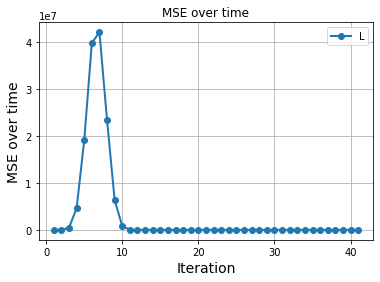

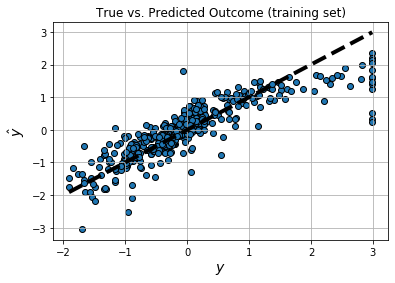

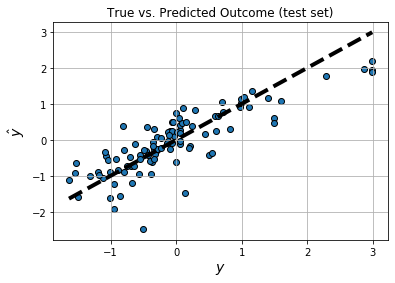

In [102]:
# ---------------- Main for linear regression using Gradient Descent --------------

def run()
n, d = Xtr.shape
T = 40

w = np.zeros((d,1))
mse_list = [mean_squared_error(Xtr, ytr, w)]

for t in range(1, T+1):
    w -= 1 / t * gradient(Xtr, w, ytr)
    mse_list.append(mean_squared_error(Xtr, ytr, w))

print(mse_list[-1])
loss_plotter(mse_list, 'MSE over time')
loss_scatter(Xtr, ytr, w, 'True vs. Predicted Outcome (training set)')
loss_scatter(Xte, yte, w, 'True vs. Predicted Outcome (test set)')

Seemingly, the spike happens because 